In [22]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

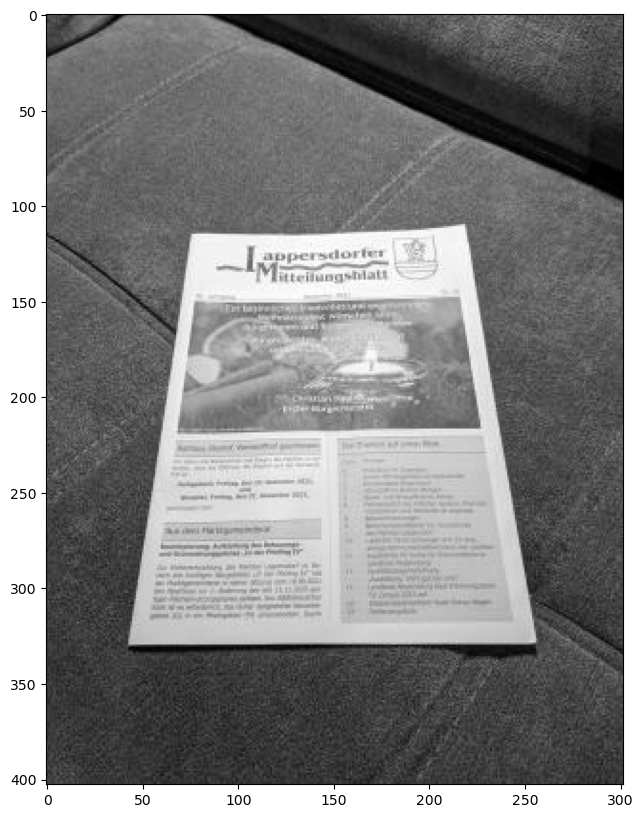

In [23]:
img = cv2.imread('C:/r_d/document.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

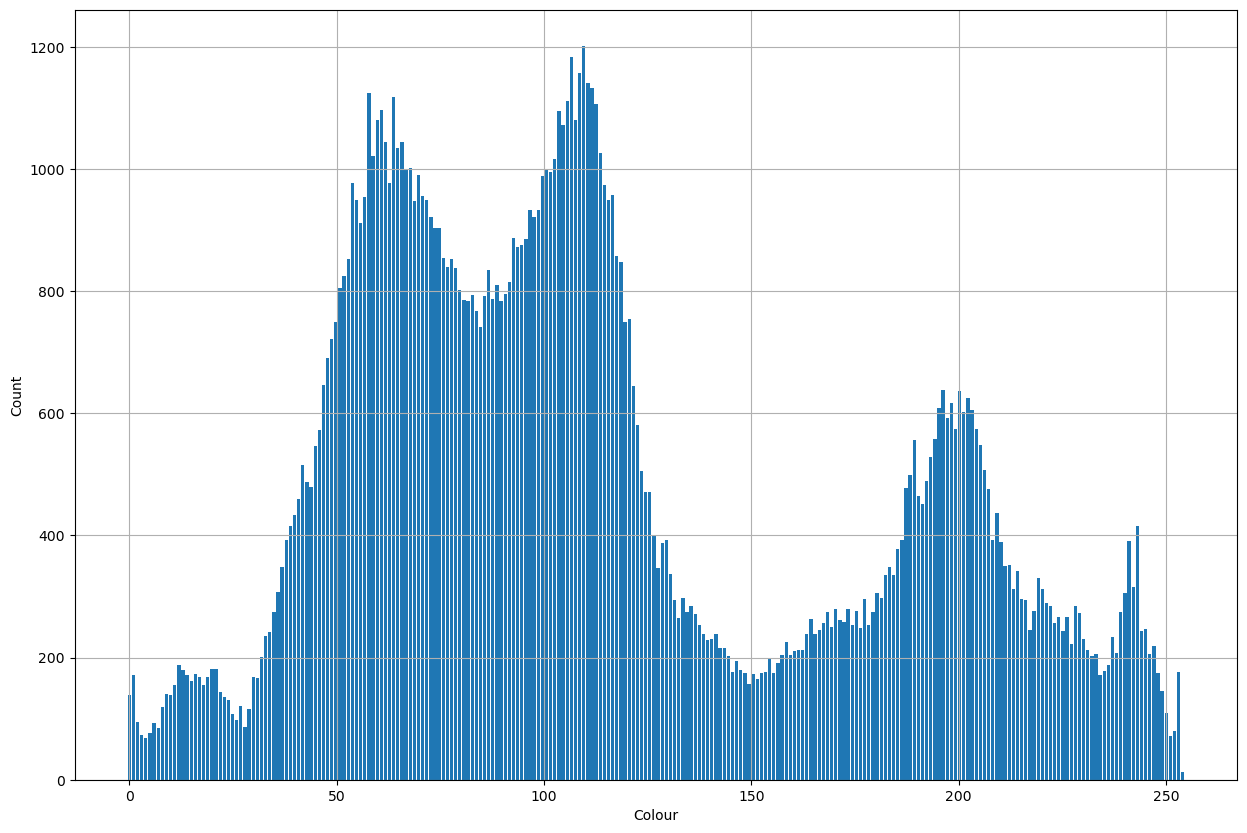

In [24]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

In [25]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows*cols

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    # Extract the image pixels corresponding to the background
    foreground = []
    # Extract the image pixels corresponding to the background
    background = []
    
    for x in range(0, rows) :
        for y in range(0, cols) :
            if img[x][y]<th :
                foreground.append([x,y])
            else :
                background.append([x,y])
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class-weights (omega parameters) for foreground and background
    omega_f = len(foreground) / num_pixels
    omega_b = len(background) / num_pixels
    
    # Compute pixel variance for foreground and background
    # Hint: Check out the var function from numpy ;-)
    # https://numpy.org/doc/stable/reference/generated/numpy.var.html
    sigma2_f = np.var(foreground)
    sigma2_b = np.var(background)
    
    # Compute the within-class variance
    wcv = omega_f*sigma2_f + omega_b*sigma2_b
    
    # Perform the optimization
    if wcv < best_wcv :
        best_wcv = wcv
        opt_th = th
        
# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)

Optimal threshold 85


(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x23cf3dc0100>)

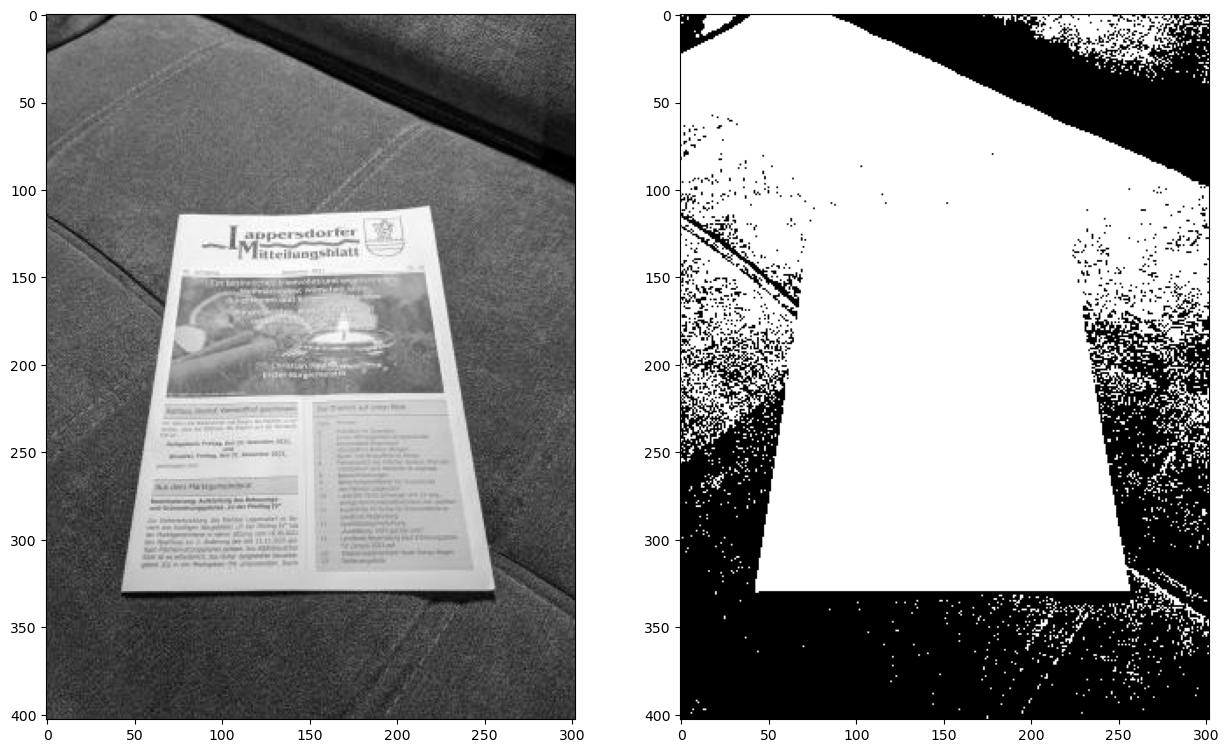

In [26]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')

In [27]:
# Questions
# 1) No, to have a bimodal histogram it needs to have 2 peaks so, at least 3 variables (high, low, high)
# 2) 85, since it is the smallest value between 2 top peaks.
# 3) There is no text or images on the document so I think result is successful